# Ejercicios de pandas

***

In [8]:
import pandas as pd
import numpy as np

## Ejercicio 1

1. Generar arreglos de numpy para obtener el resultado de $ z = f(x,y) $ para un conjunto de entrada aleatorio de al menos 100 filas.

- Crear un `DataFrame` de pandas con las columnas $x$, $y$ y $z$.
- Obtener el promedio de cada `Series` en el `DataFrame`.

In [15]:
# Tu código acá
x = np.linspace(0,100,100)
y = 8*x**4+2*x+8

print(x)

print(y)

#1

df = pd.DataFrame({'x':x, 'y':y})

#2

names = pd.Series(['Variable X', 'Variable Y'])
z = pd.Series([x,y])

df = pd.DataFrame({ 'Variables': names, 'Datos': z })
df

#3. promedio

y.mean()

[  0.           7.14285714  14.28571429  21.42857143  28.57142857
  35.71428571  42.85714286  50.          57.14285714  64.28571429
  71.42857143  78.57142857  85.71428571  92.85714286 100.        ]
[  0.           5.55555556  11.11111111  16.66666667  22.22222222
  27.77777778  33.33333333  38.88888889  44.44444444  50.
  55.55555556  61.11111111  66.66666667  72.22222222  77.77777778
  83.33333333  88.88888889  94.44444444 100.        ]


50.0

## Ejercicio 1.1

De forma similar al ejercicio anterior, genere un `DataFrame` con los resultados de una función $y = f(x)$ con al menos 100 filas. 

- Grafique los resultados con `matplotlib` utilizando 2 variantes:

    - a. Utilizando los arreglos de numpy (objetos `ndarray`) que utilizó para generar el `DataFrame`.
    - b. Utilizando los objetos `Series` del `DataFrame`.
    
- Obtenga el objeto *handler* de la gráfica y guarde la gráfica en PDF.

- Asegúrese de entender la diferencia entre generar la gráfica para guardarla (sin mostrarla) y generar la gráfica para mostrarla.

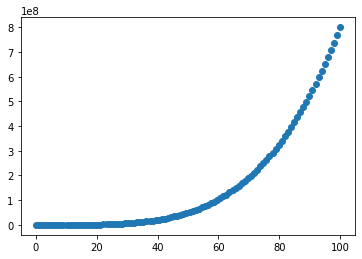

In [50]:
import math
import matplotlib.pyplot as plt


x = np.linspace(0,100,100)
y = 8*x**4+2*x+8

df = pd.DataFrame({'x':x, 'y':y})

g = plt.scatter(x,y)

g




In [78]:
handler = df.plot.scatter(x,y) 
handler.get_figure().savefig('graph.pdf', dpi=60)

handler

ValueError: cannot copy sequence with size 314 to array axis with dimension 13

## Ejercicio 2

1. Prueba 5 funciones de la primera página del *cheat sheet* no vistas en la exposición.

In [47]:
import pandas as pd
import numpy as np
import random

b = 100*(np.random.random((1, 5000)))






## Ejercicio 3

Resuelva las siguientes preguntas utilizando las funciones de pandas. Ayúdese con la hoja de trucos.

In [51]:
df = pd.read_csv("data/titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 - ¿Cuál es la tarifa máxima que se pagó? ¿Y la mediana?

In [52]:
df['Fare'].max()

512.3292

In [53]:
df['Fare'].mean()

32.2042079685746

- Calcule la tasa de supervivencia promedio para todos los pasajeros (nota: la columna `Survived` indica si alguien sobrevivió (1) o no (0)).

In [57]:
df['Survived'].mean()

0.3838383838383838

- Haga una gráfica de la distribución de edades de los pasajeros del Titanic

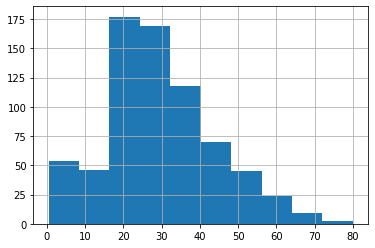

In [58]:
df['Age'].hist()

- Según el conjunto de datos del Titanic, seleccione todas las filas para pasajeros masculinos y calcule la edad media de esos pasajeros. Haz lo mismo para las pasajeras.

In [60]:
age_male = df[df['Sex']=='male']
age_female = df[df['Sex']=='female']


print(age_male['Age'].mean())

print(age_female['Age'].mean())

30.72664459161148
27.915708812260537


- Según el conjunto de datos del Titanic, ¿cuántos pasajeros mayores de 70 estaban en el Titanic?

In [61]:
(df['Age'] > 70).value_counts()

False    886
True       5
Name: Age, dtype: int64

- Calcula la edad promedio para cada sexo. Ahora utiliza el método `groupby`.

In [62]:
x = df.groupby('Sex') 
x['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

- Calcule esta relación de supervivencia para todos los pasajeros menores de 25 años (recuerde: filtrado / indexación booleana).

In [63]:
under25 = df[df['Age']< 25]
under25['Survived'].mean()

0.4244604316546763

- ¿Cuál es la diferencia en la proporción de supervivencia entre sexos?

In [67]:
male_percent = df[df['Sex']=="male"]
female_percent = df[df['Sex']=="female"]

print(male_percent['Survived'].mean())

print(female_percent['Survived'].mean())

0.18890814558058924
0.7420382165605095


- ¿O cómo difiere la proporción de sobrevivientes entre las diferentes clases de pasajeros? Haz una gráfica de barras visualizando la relación de supervivencia para las 3 clases.

In [71]:
fst_class = df[df['Pclass'] == 1]
snd_class = df[df['Pclass'] == 2]
trd_class = df[df['Pclass'] == 3]


print(fst_class['Survived'].mean())
print(snd_class['Survived'].mean())
print(trd_class['Survived'].mean())



0.6296296296296297
0.47282608695652173
0.24236252545824846


- Haga una gráfica de barras para visualizar la tarifa promedio pagada por los pasajeros de acuerdo a su edad. Para esto:
    - Primero, separamos a los pasajeros por rango, utilizando la función `pd.cut` y agregamos esta serie al DataFrame.
    - Debemos agrupar por esta columna y calcular el promedio de las tarifas.
    - Por último, agregamos `plot(kind='bar')` para obtener la gráfica de barras.

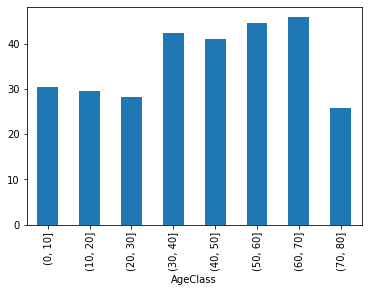

In [75]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

df.groupby('AgeClass').mean()['Fare'].plot(kind ="bar")

